**Importing The Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading The Datasets**

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

**Printing First Five Columns Of Datasets**

In [ ]:
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

**Finding Missing Values**

In [ ]:
print("Missing Values in Customers:\n", customers.isnull().sum(), "\n")
print("Missing Values in Products:\n", products.isnull().sum(), "\n")
print("Missing Values in Transactions:\n", transactions.isnull().sum(), "\n")

Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



**Reviewing Basic Statistics**

In [ ]:
print("Customers Info:")
print(customers.info(), "\n")
print(customers.describe(), "\n")

print("Products Info:")
print(products.info(), "\n")
print(products.describe(), "\n")

print("Transactions Info:")
print(transactions.info(), "\n")
print(transactions.describe(), "\n")

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3 

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  10

**Filling Missing Values**

In [ ]:
customers['Region'].fillna('Unknown', inplace=True)
transactions['TotalValue'].fillna(transactions['TotalValue'].mean(), inplace=True)

<ipython-input-11-d39d35262e5e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['Region'].fillna('Unknown', inplace=True)
<ipython-input-11-d39d35262e5e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

**Removing Duplicates**

In [ ]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)
print("Missing Values After Handling:")
print(customers.isnull().sum(), "\n")
print(products.isnull().sum(), "\n")
print(transactions.isnull().sum(), "\n")

Missing Values After Handling:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



**Merging Datasets**

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print("Merged Data Preview:")
print(merged_data.head(), "\n")

Merged Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiv

**Univariate Analysis**

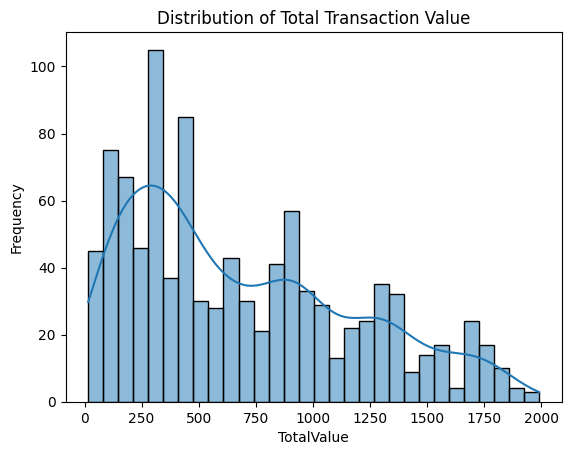

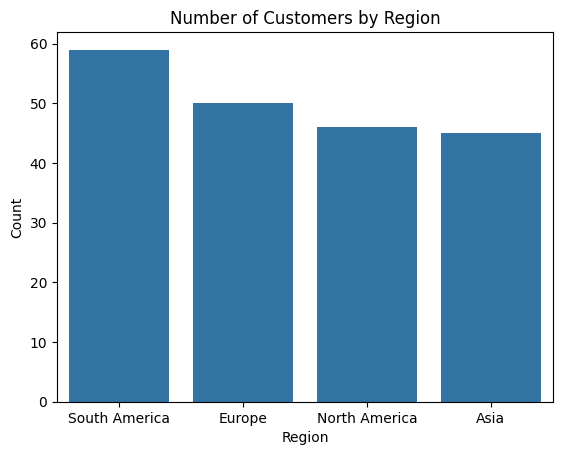

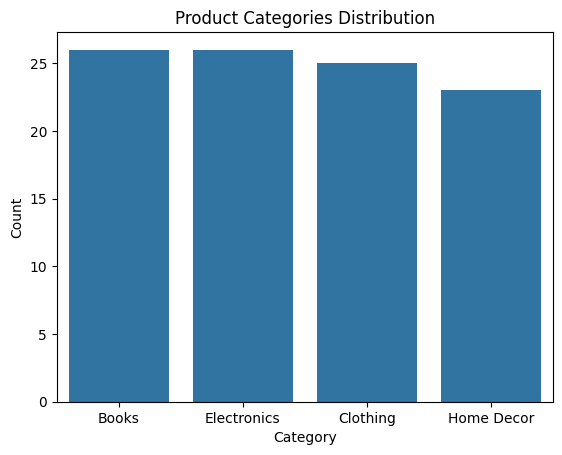

In [ ]:
sns.histplot(merged_data['TotalValue'], kde=True, bins=30)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('TotalValue')
plt.ylabel('Frequency')
plt.show()
# Count of customers by region
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()
# Top product categories
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


**Bivariate Analysis**

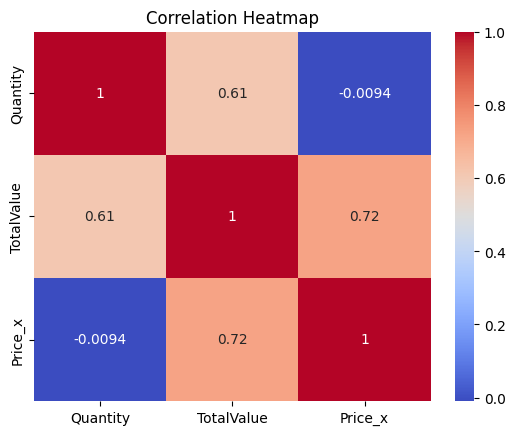

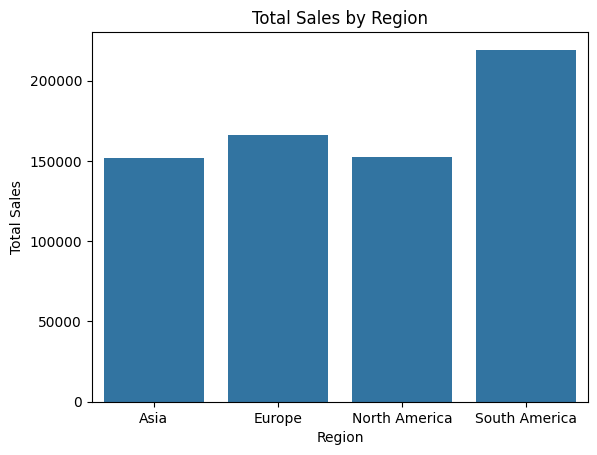

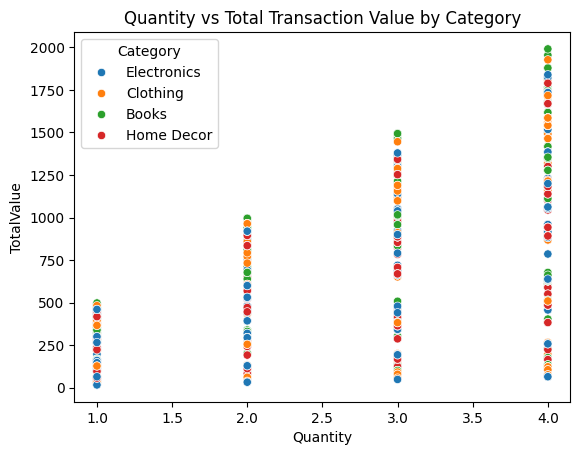

In [ ]:
# Correlation heatmap
corr = merged_data[['Quantity', 'TotalValue', 'Price_x']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='TotalValue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()
# Scatter plot of Quantity vs TotalValue
sns.scatterplot(data=merged_data, x='Quantity', y='TotalValue', hue='Category')
plt.title('Quantity vs Total Transaction Value by Category')
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.show()

**Time Series Analysis**

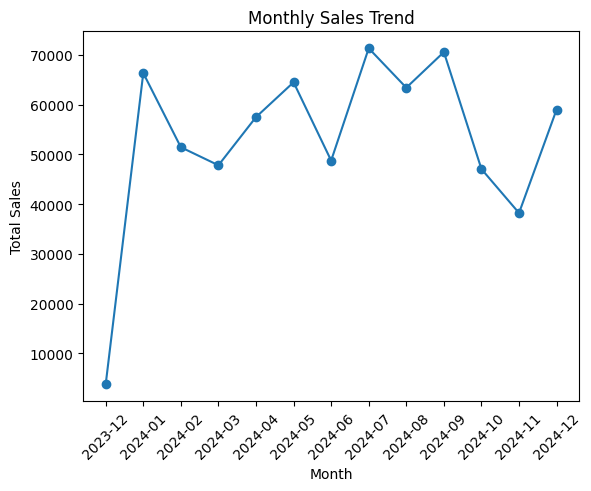

In [ ]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
# Sales trend by month
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
